In [13]:
import sys
import pathlib as pl
sys.path.insert(0,str(pl.Path("../").absolute()))

In [14]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [15]:
from ipynb.fs.defs.transformer_experimentation import TimeSeriesTransformer

In [16]:
losses = np.load("../data/experiment/losses.npy")
losses = np.nan_to_num(losses)
losses = losses[losses < 1.0]
losses.var()

0.07124338575125758

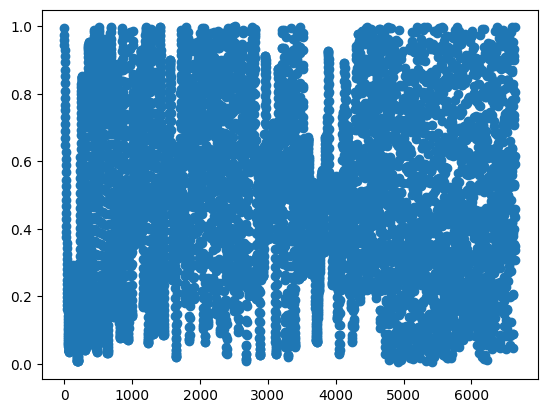

In [17]:
plt.figure()
plt.scatter(list(range(losses.shape[0])),losses	)
plt.show()

In [18]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"using device: {device}")
params = torch.load("../data/experiment/model_params.pt")
weighs = torch.load("../data/experiment/model_weights.pt")
model = TimeSeriesTransformer(d_input=params["d_input"], d_model=params["d_model"])
model.to(device)
model.eval()
#model

using device: cuda


TimeSeriesTransformer(
  (encoder): Encoder(
    (input_layer): Linear(in_features=3, out_features=2, bias=True)
    (pos_encoding_layer): PositionalEncoding(
      (dropout): Dropout(p=0.2, inplace=False)
    )
    (encoder_layers): TransformerEncoder(
      (layers): ModuleList(
        (0-3): 4 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=2, out_features=2, bias=True)
          )
          (linear1): Linear(in_features=2, out_features=2048, bias=True)
          (dropout): Dropout(p=0.2, inplace=False)
          (linear2): Linear(in_features=2048, out_features=2, bias=True)
          (norm1): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.2, inplace=False)
          (dropout2): Dropout(p=0.2, inplace=False)
        )
      )
    )
  )
  (decoder): Decoder(
    (input_layer): Linear(in

In [19]:
windows = np.load("../data/preprocessed/window_data.npy",allow_pickle=True)
windows.shape

(413134, 5, 4)

In [20]:
window = windows[0][:,1:]
window

array([[0.8363533269071048, 0.5364075146871605, 0.7187686443486907],
       [0.8386994559942362, 0.5195984536142677, 0.7269638713954258],
       [0.8390029785232791, 0.5201056424391788, 0.7219008949287371],
       [0.842335055517939, 0.5181078382134809, 0.7147828969174677],
       [0.8437459349661278, 0.5172085051215274, 0.7097696387139543]],
      dtype=object)

In [21]:
feature, label = window[:4,:].astype(float), window[4:,:].astype(float)
feature, label

(array([[0.83635333, 0.53640751, 0.71876864],
        [0.83869946, 0.51959845, 0.72696387],
        [0.83900298, 0.52010564, 0.72190089],
        [0.84233506, 0.51810784, 0.7147829 ]]),
 array([[0.84374593, 0.51720851, 0.70976964]]))

In [22]:
def callModel(model, feature):
    feature = torch.Tensor(feature).to(device)
    target = feature[-1:, :]
    print(feature.shape, target.shape)
    res = model(feature,target=target,mask=None)
    return res
callModel(model, feature)

torch.Size([4, 3]) torch.Size([1, 3])


tensor([[ 1.1285, -0.7402,  1.2843]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [23]:
t = torch.load("test.pt")
type(t)

dict